<a href="https://colab.research.google.com/github/PGoyal-06/Computer_Vision/blob/main/02_neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network clasification with TensorFlow

In this notebook, we are going to learn how to write neural networks for classification problems

A classification problem is where you try to classifiy something as one thing or another.

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make a 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

The data is a little hard to understand right now... let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


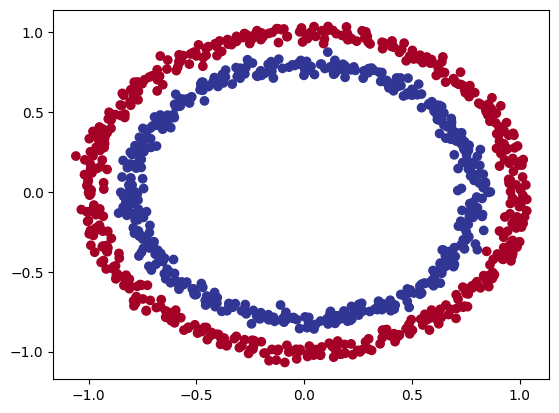

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [ ]:
# Check the shapes of the features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How mnay samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFLow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 7ms/step - loss: 1.3826 - accuracy: 0.4869
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.5046
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.4944
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5009
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4961


In [ ]:
# improve the model
model_1.fit(tf.expand_dims(X, axis=1), y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934717893600464, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932756304740906, 0.5]

## Improving the model

Let's see how we can improve the model.

1. Create a model - add more layers or increase the number of hidden units within a layer.
2. Compile the model - Choose a different optimization function such as Adam instead of SGD.
3. Fit the model - Fit the model for more epochs.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5000


[0.6940799355506897, 0.5]

To visualize the model's predictions, let's create  a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [ ]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (to make predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predicitons
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape oue predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


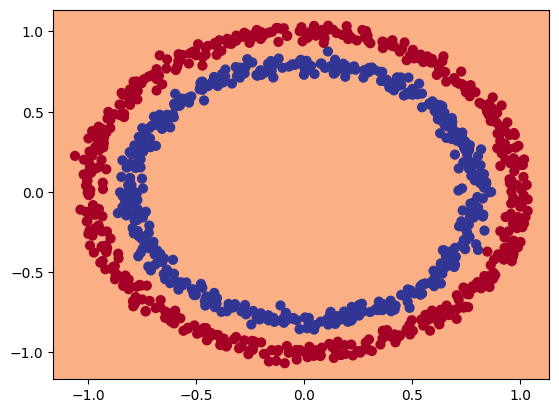

In [ ]:
# Check out the predictions the model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regression data
#model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 458.6586 - mae: 458.6586
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 395.8596 - mae: 395.8596
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 335.0445 - mae: 335.0445
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 271.1608 - mae: 271.1608
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 203.5544 - mae: 203.5544
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 128.8680 - mae: 128.8680
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 57.4814 - mae: 57.4814
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 59.3290 - mae: 59.3290
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 65.5145 - mae: 65.5145
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 51.7365 - mae: 51.7365
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 4ms/step


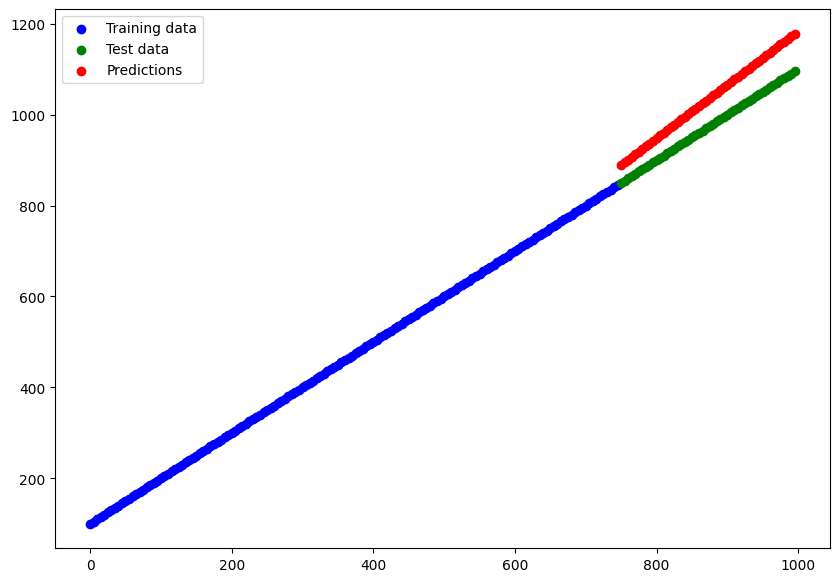

In [ ]:
y_reg_pred = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3055 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0688 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9545 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7088 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6168 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5120 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4046 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2555 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0601 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 2.7490 - accuracy: 0.5000
Epoch 11/

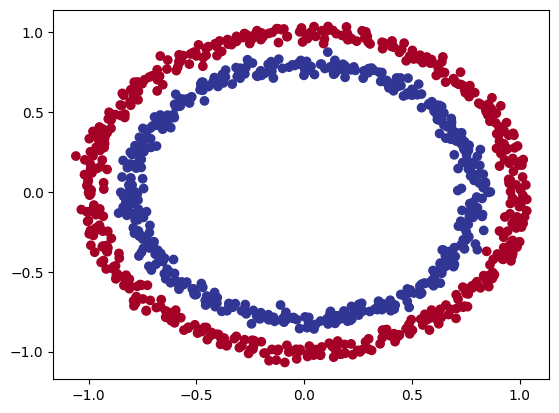

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


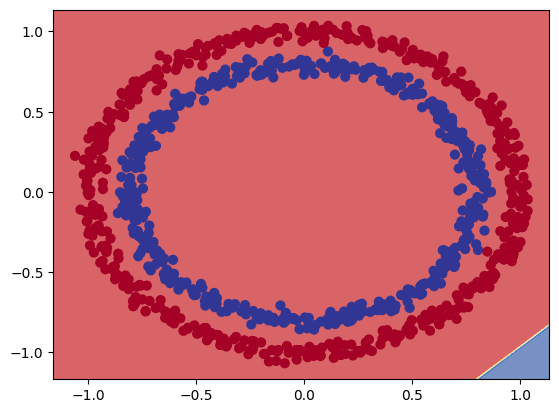

In [ ]:
# Check the decision boundary for model_4
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build the first neural netowrk with a non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7503 - accuracy: 0.5054
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7597 - accuracy: 0.4997
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6753 - accuracy: 0.5012
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6528 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6069 - accuracy: 0.5021
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5922 - accuracy: 0.5004
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5550 - accuracy: 0.4996
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4890 - accuracy: 0.4991
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4195 - accuracy: 0.5013
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3781 - accuracy: 0.4967
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 1.1348 - accuracy: 0.4310
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9879 - accuracy: 0.3410
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9378 - accuracy: 0.3380
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.3200
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.3310
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8584 - accuracy: 0.2940
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.3270
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.3060
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.2910
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.2730
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9970


[0.026104919612407684, 0.996999979019165]

313/313 [==============================] - 0s 1ms/step
doing binary classification


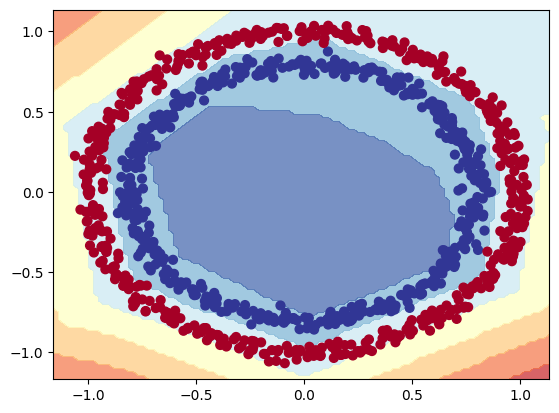

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5070
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5080
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5110
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5100
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5100
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5150
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5170
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5200
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5120
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


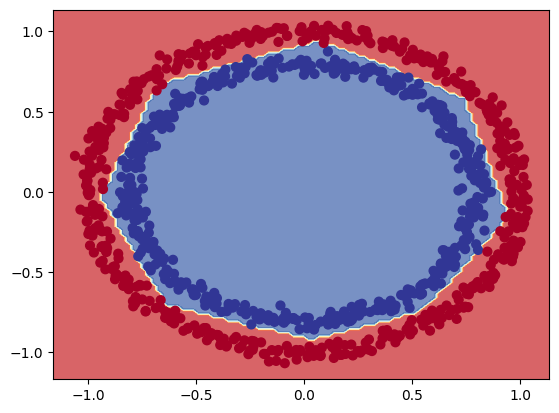

In [ ]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

🔑 **Note:** The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

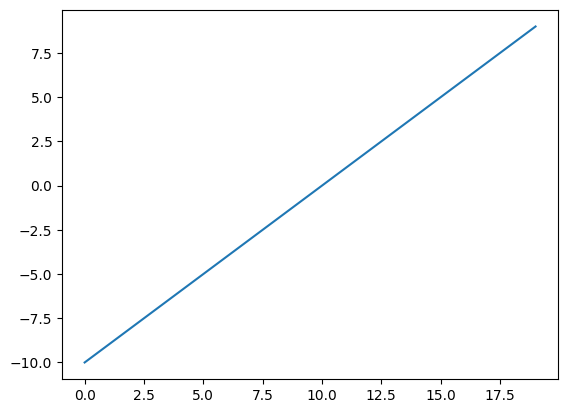

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# Use the function on the tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

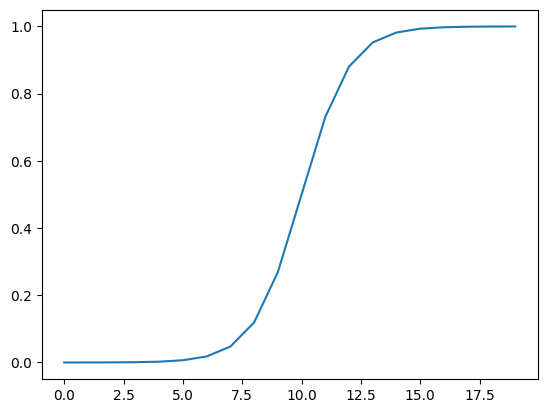

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(x, 0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

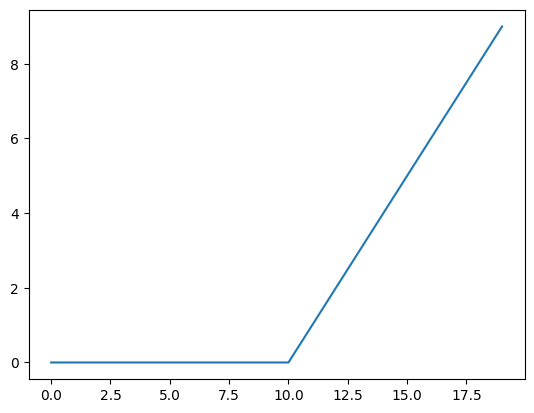

In [ ]:
plt.plot(relu(A))

##Evaluating and Improving our classification model


In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4800
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4800
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4837
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5063
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5025
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5100
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5138
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5163
Epoch 11/

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.9050


[0.39005744457244873, 0.9049999713897705]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


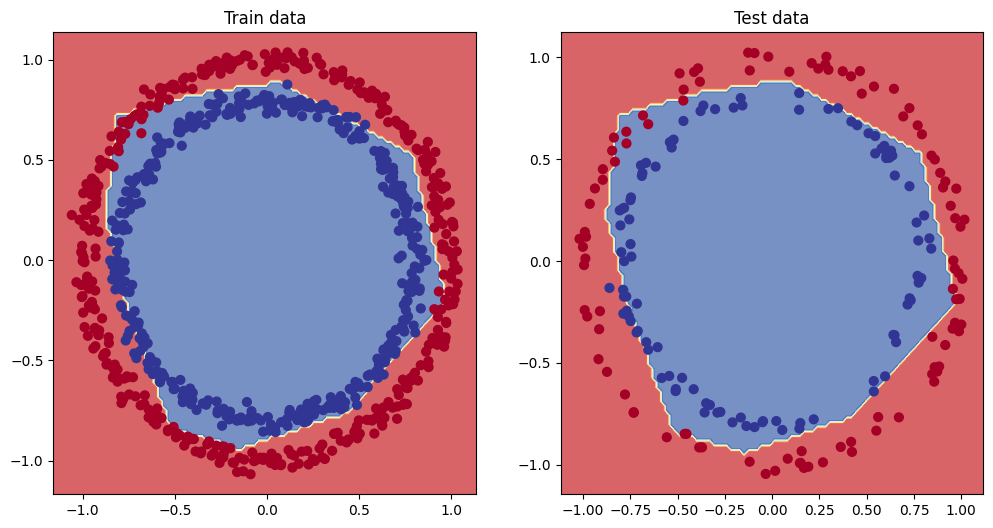

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train data")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test data")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.695634,0.48000
1,0.694047,0.48000
2,0.692975,0.48000
3,0.692223,0.48375
4,0.691745,0.50000
...,...,...
95,0.415839,0.91250
96,0.410795,0.91250
97,0.404329,0.92000
98,0.399147,0.92000


Text(0.5, 1.0, 'Model_8_loss_Curves')

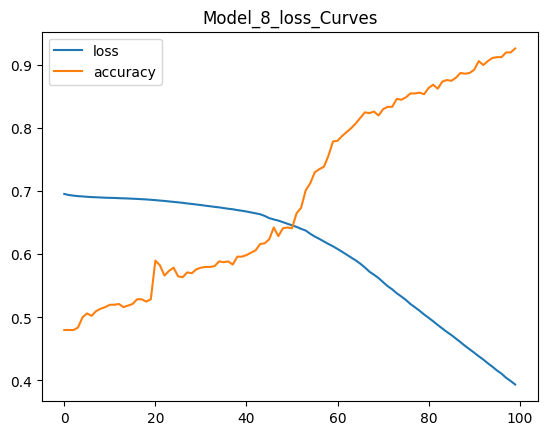

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8_loss_Curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it is training.
* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4825 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4800 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4775 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4787 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4787 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4787 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4812 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

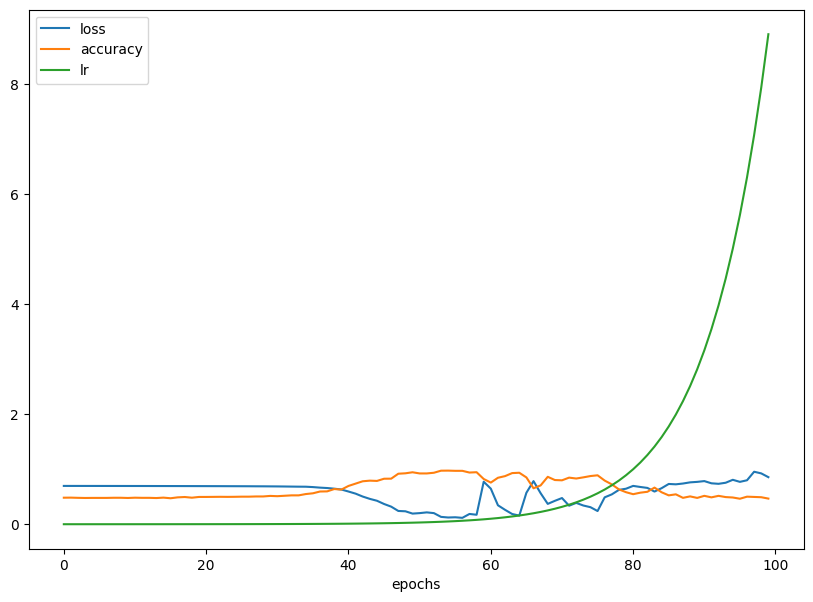

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

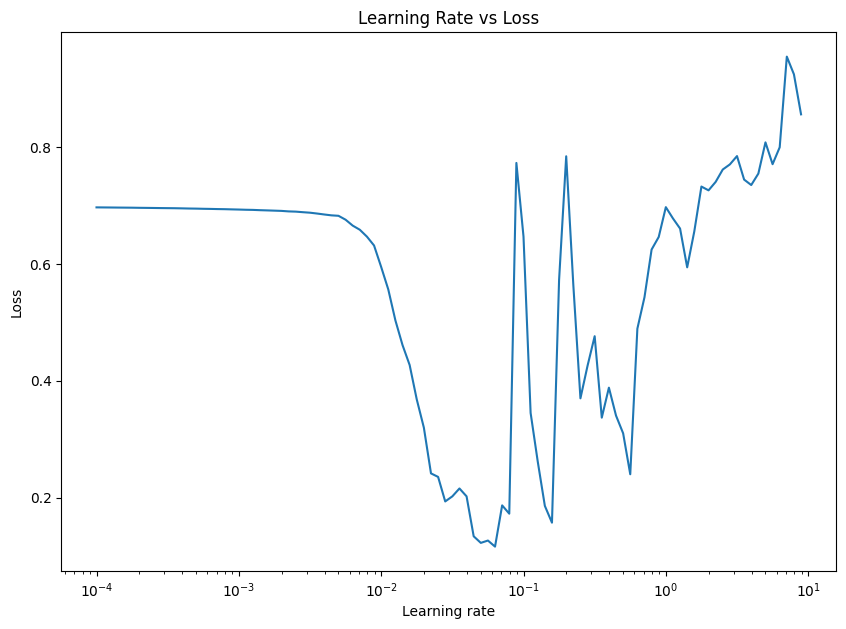

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.05),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=95)

Epoch 1/95
25/25 [==============================] - 2s 7ms/step - loss: 0.7144 - accuracy: 0.5063
Epoch 2/95
25/25 [==============================] - 0s 7ms/step - loss: 0.7095 - accuracy: 0.5075
Epoch 3/95
25/25 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.5050
Epoch 4/95
25/25 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5013
Epoch 5/95
25/25 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5038
Epoch 6/95
25/25 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5038
Epoch 7/95
25/25 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4950
Epoch 8/95
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4963
Epoch 9/95
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4963
Epoch 10/95
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 11/95
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.8450


[0.5018603801727295, 0.8450000286102295]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.9050


[0.39005744457244873, 0.9049999713897705]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


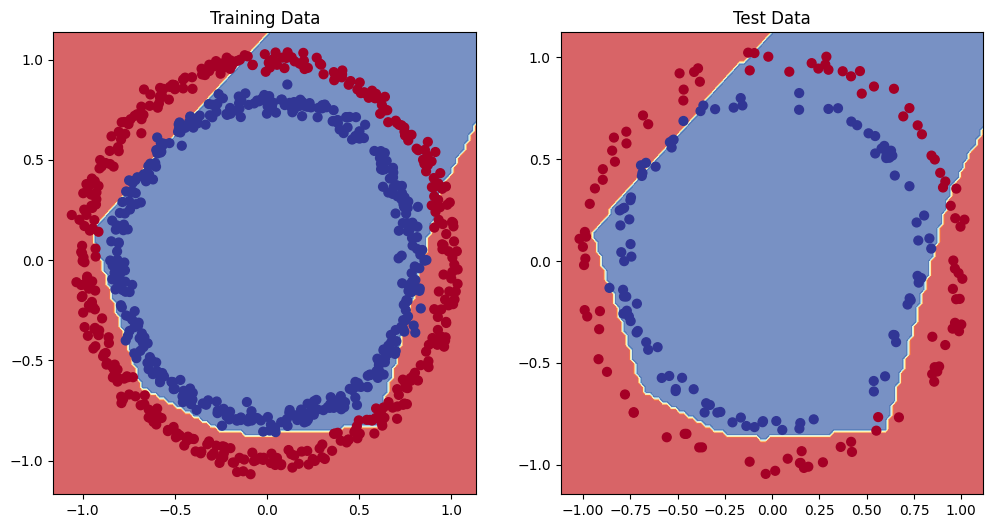

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing model results, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8450
Model loss on the test set: 0.5018603801727295
Model accuracy on the test set: 84.50%


How about a confusion matrix?

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds)) #tf.round() is used to convert everything to 1's and 0's

7/7 [==============================] - 0s 2ms/step


array([[76, 25],
       [ 6, 93]])

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.6378034 ],
       [0.5946752 ],
       [0.6480369 ],
       [0.7165641 ],
       [0.63420725],
       [0.40513635],
       [0.4583833 ],
       [0.2782489 ],
       [0.62035054],
       [0.5701272 ]], dtype=float32)

The predictions array has come out in **prediction probability** form... the standard ouput from the sigmoid activation functions :(

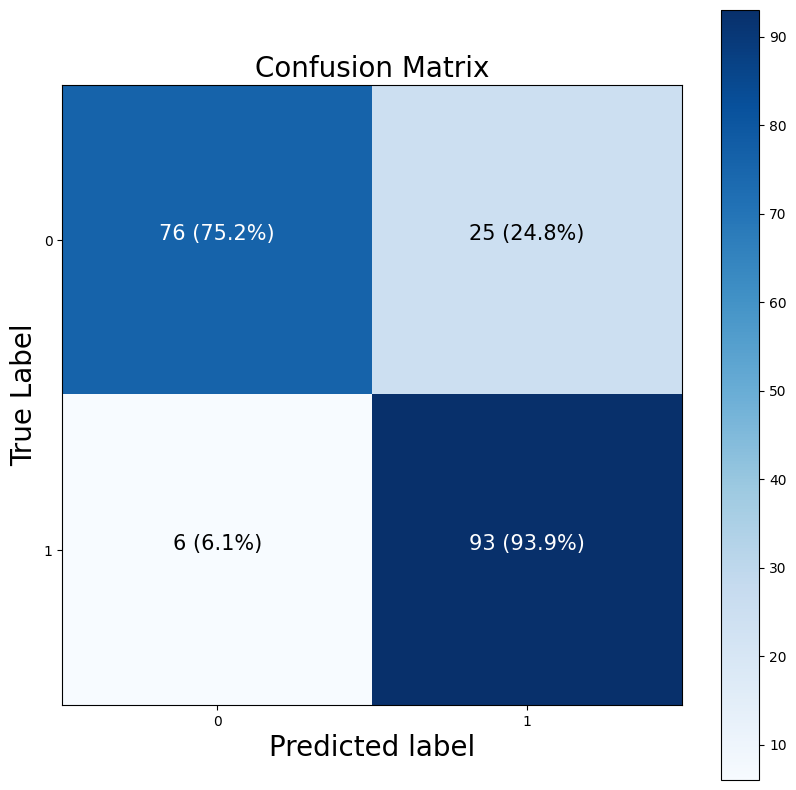

In [ ]:
# Let's prettify the confusion matrix
import itertools

figsize= (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# LEt's label the axis
ax.set(title="Confusion Matrix",
       xlabel = "Predicted label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.

To practice milti-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Test label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

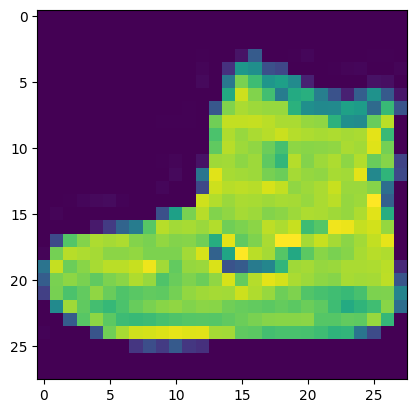

In [ ]:
# PLot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Check the samples label
train_labels[0]

9

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

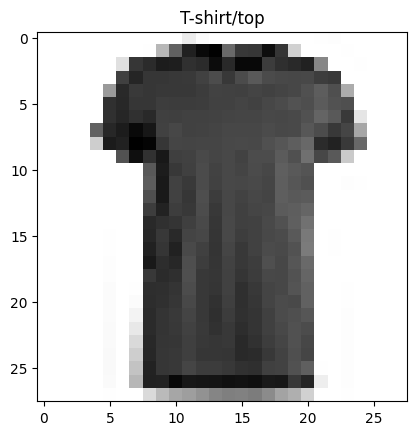

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

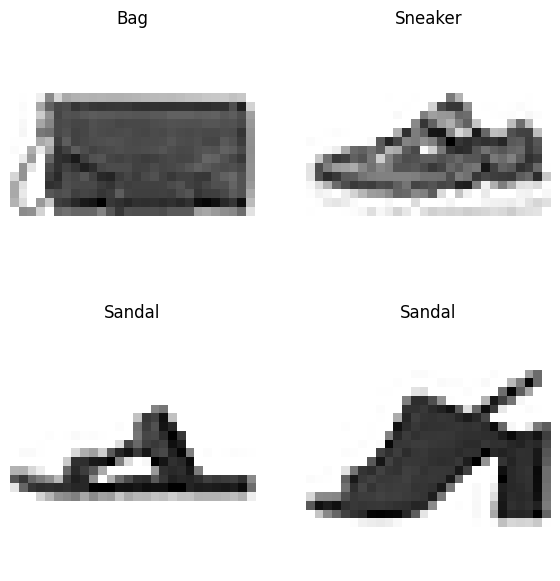

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For the multi-class classification model, we can use a similar architecture to the binary classifiers, however, a few things will be tweaked:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
  * If the labels are one-hot encoded, use CategoricalCrossentropy()
  * If the labels are integer form, use SparseCategoriclaCrossentropy()
* Output layer activation = Softmax(not sigmoid)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3321 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# min and max of training date
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in tensors they try to find patterns in between 0 & 1.

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4463 - accuracy: 0.4832 - val_loss: 0.9308 - val_accuracy: 0.6929
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8064 - accuracy: 0.7380 - val_loss: 0.7436 - val_accuracy: 0.7538
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7104 - accuracy: 0.7617 - val_loss: 0.7253 - val_accuracy: 0.7586
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6749 - accuracy: 0.7721 - val_loss: 0.6838 - val_accuracy: 0.7723
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6537 - accuracy: 0.7785 - val_loss: 0.6772 - val_accuracy: 0.7701
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6326 - accuracy: 0.7862 - val_loss: 0.6425 - val_accuracy: 0.7823
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6140 - accuracy: 0.7916 - val_loss: 0.6524 - val_accuracy:

**Note:** Neural Networks tend to prefer data in numerical form as well as normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

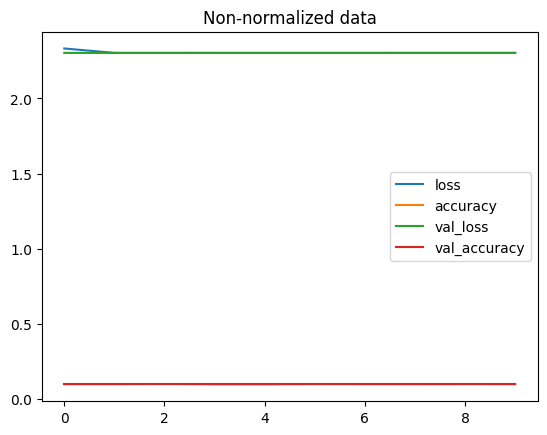

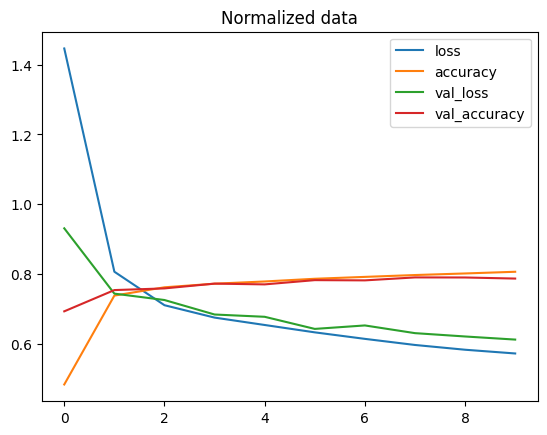

In [ ]:
import pandas as pd
# plot the non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot the normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when comparing models, it is important to make sure to compare them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0990 - accuracy: 0.6027 - val_loss: 0.7679 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6939 - accuracy: 0.7453 - val_loss: 0.6736 - val_accuracy: 0.7532 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6056 - accuracy: 0.7847 - val_loss: 0.6069 - val_accuracy: 0.7862 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5653 - accuracy: 0.8051 - val_loss: 0.5880 - val_accuracy: 0.7973 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5459 - accuracy: 0.8118 - val_loss: 0.5767 - val_accuracy: 0.8019 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5347 - accuracy: 0.8163 - val_loss: 0.5890 - val_accuracy: 0.7947 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

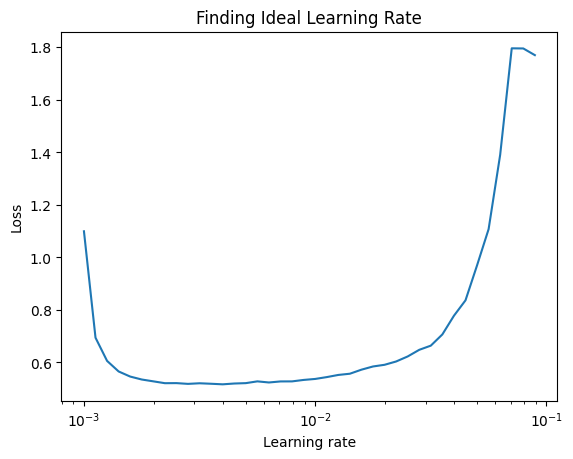

In [ ]:
# plot the lr decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5249 - accuracy: 0.3656 - val_loss: 1.2191 - val_accuracy: 0.5143
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1302 - accuracy: 0.5364 - val_loss: 1.0636 - val_accuracy: 0.5681
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0142 - accuracy: 0.6055 - val_loss: 0.9792 - val_accuracy: 0.6203
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9387 - accuracy: 0.6410 - val_loss: 0.9327 - val_accuracy: 0.6324
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8892 - accuracy: 0.6355 - val_loss: 0.8827 - val_accuracy: 0.6323
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8553 - accuracy: 0.6276 - val_loss: 0.8717 - val_accuracy: 0.6310
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8085 - accuracy: 0.6639 - val_loss: 0.8130 - val_accuracy:

## Evaluating the multi-cass classification model

To evaluate the multi-class classification model, we could:
* Evaluate its performace using other classification metrics (such as a confusion metrics)
* Assess some of its predictions (through visualizations)
* Improve its results (training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...


In [ ]:
# create a confusion matrix|
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # LEt's label the axis
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make predictions with the model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[9.1252800e-10, 6.2620222e-11, 1.2933918e-31, 4.3508456e-13,
        6.8619823e-23, 5.5538408e-02, 1.1579161e-18, 3.4323287e-01,
        4.7470075e-03, 5.9648174e-01],
       [6.6363821e-03, 1.3768401e-05, 3.5841507e-01, 9.1432268e-03,
        4.5984706e-01, 2.4349186e-04, 1.4969416e-01, 5.6627887e-05,
        1.5875351e-02, 7.4904521e-05],
       [3.5492203e-04, 9.9777859e-01, 5.5104386e-11, 1.8660468e-03,
        1.7648680e-10, 3.1446805e-07, 1.2331175e-07, 2.1519958e-15,
        6.1705826e-16, 1.6820721e-24],
       [6.5844634e-04, 9.9305934e-01, 3.8366230e-10, 6.2803365e-03,
        1.9245088e-09, 1.3647509e-06, 5.1443817e-07, 2.2461694e-14,
        1.7839944e-14, 1.1666382e-22],
       [6.2170707e-02, 2.0591596e-04, 4.3391559e-01, 1.2045275e-02,
        1.2825485e-01, 2.4669862e-04, 3.6256689e-01, 2.2865024e-05,
        5.7034160e-04, 7.9772212e-07]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data the model was trained on (e.g. if the model was trained on normalized data, then make predictions on normalized data)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([9.1252800e-10, 6.2620222e-11, 1.2933918e-31, 4.3508456e-13,
        6.8619823e-23, 5.5538408e-02, 1.1579161e-18, 3.4323287e-01,
        4.7470075e-03, 5.9648174e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 4, 1, 1, 2, 1, 4, 2, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[689,   1,  21, 104,  34,   0, 130,   0,  21,   0],
       [ 19, 901,   4,  58,   7,   0,   9,   0,   2,   0],
       [ 19,   0, 384,  11, 471,   0,  89,   0,  26,   0],
       [ 23,   7,  10, 840,  38,   0,  45,   0,  37,   0],
       [  2,   0,  86,  45, 759,   0,  46,   0,  62,   0],
       [  0,   0,   0,   2,   1, 864,   0,  92,  14,  27],
       [137,   0, 210,  58, 350,   0, 200,   0,  45,   0],
       [  0,   0,   0,   0,   0,  56,   0, 881,   0,  63],
       [  0,   0,   2,   9,  34,   3,   5,   3, 937,   7],
       [  0,   0,   0,   0,   1,   7,   0,  43,  12, 937]])

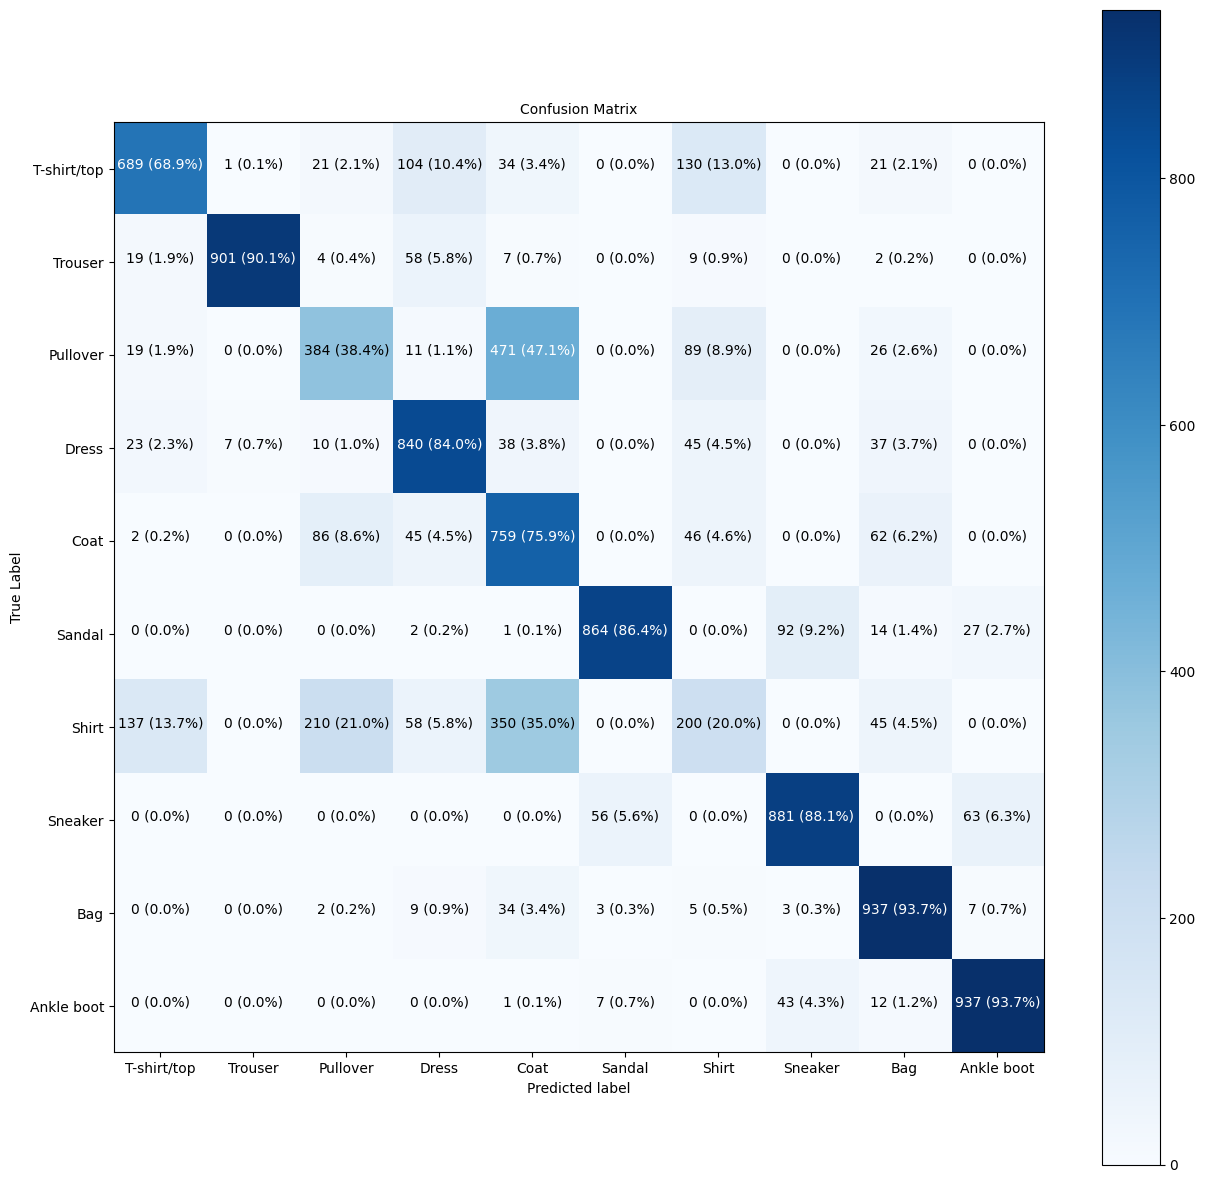

In [ ]:
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size=(10))

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

Let's create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a predictionand truth label.
  """
  # set up random integer
  i = random.randint(0, len(images))

  # create predicitons and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color="red"
  # Add xlabel info (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red if prediction is right or wrong

1/1 [==============================] - 0s 22ms/step


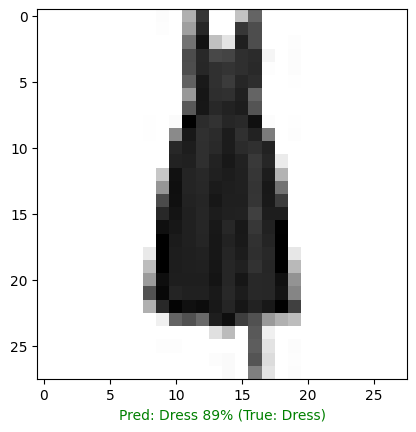

In [ ]:
# check out a random image and its predictions
plot_random_image(model_14, test_data_norm, test_labels, class_names)

## What patterns is our model learning?


In [ ]:
# Find the layers of the most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in the network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 1.2414157e-04, -3.5814956e-02, -5.1037711e-01,  7.6400065e-01],
        [ 8.6925995e-01, -4.9177479e-02, -7.6911151e-01,  1.5459672e+00],
        [ 7.1609902e-01, -5.0883014e-02, -1.2581787e+00,  1.6416242e+00],
        ...,
        [ 2.5895348e-01, -1.3562433e-02, -1.7734507e-01, -1.5460470e-01],
        [-1.6915210e-01,  8.2781002e-02,  2.4989189e-01,  4.4307083e-01],
        [-4.7417307e-01,  2.6841700e-02,  1.0361519e-01,  3.9306933e-01]],
       dtype=float32),
 (784, 4))

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.7508147 , -0.01799096,  0.22960296,  2.3716397 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


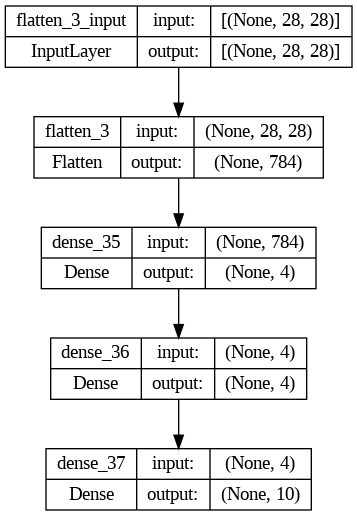

In [ ]:
# LEt's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)